# SpaceX Assignment

# Data Explore

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Collection

In [2]:
data = pd.read_csv("dataset.csv")

---

# Data Visualization

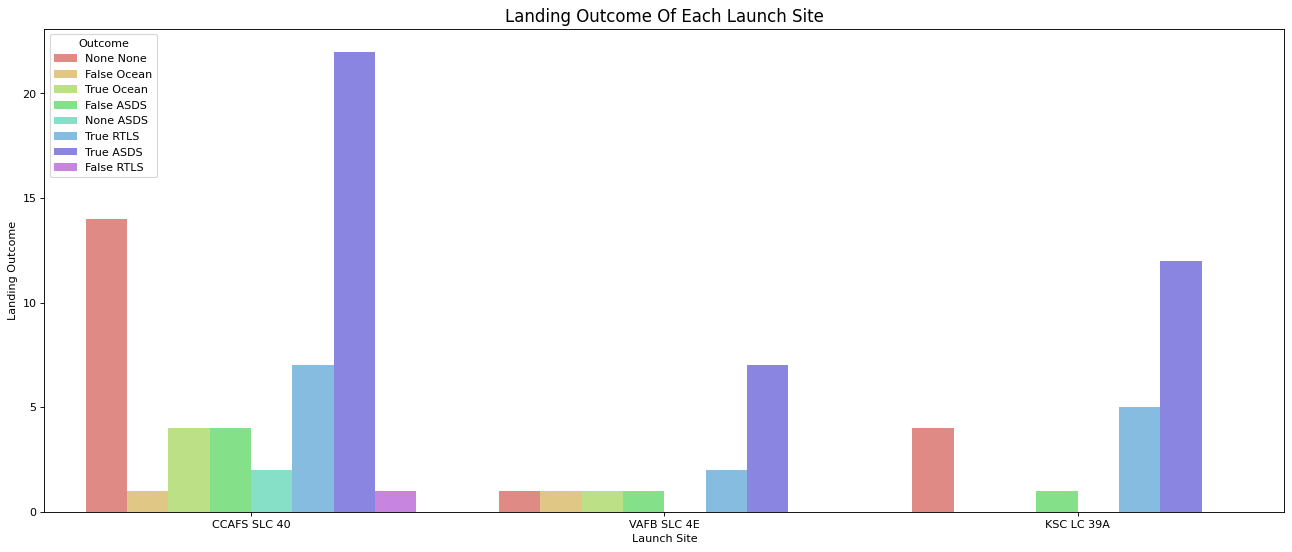

In [68]:
# Visualize the landing outcome of each launch site to know which launch side had the most successful landings 

plt.figure(figsize = (20,8), dpi = 80)
sns.countplot(x = "LaunchSite", data = data, hue = "Outcome", palette = sns.hls_palette(9,l=.7,s=.8));
plt.title("Landing Outcome Of Each Launch Site", fontsize = 15)
plt.xlabel("Launch Site")
plt.ylabel("Landing Outcome")
plt.show()

<Figure size 1600x640 with 0 Axes>

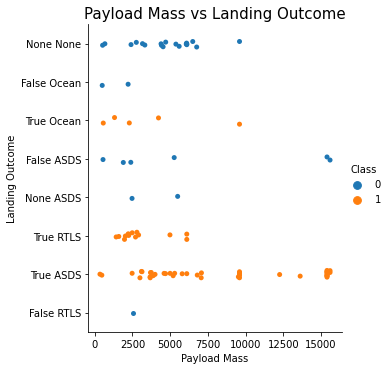

In [67]:
# Visualize the relationship between payload mass and landing outcome

x = data.loc[:,"PayloadMass"]
y = data.loc[:,"Outcome"]

plt.figure(figsize = (20,8), dpi = 80)
# sns.palplot(sns.hls_palette(9,l=.7,s=.8))
# plt.scatter(x,y)
# sns.catplot(x='PayloadMass',y='Orbit',data=data,hue='Class')

sns.catplot(x = 'PayloadMass',y = 'Outcome',data = data,hue = 'Class')

plt.title("Payload Mass vs Landing Outcome", fontsize = 15)
plt.xlabel("Payload Mass")
plt.ylabel("Landing Outcome")
plt.show()